## Load Data and Initial Grid Search

In [1]:
DATA_NAME = 'approx1e5-spaceNet-wavelet-blue' # size-name-transform-channel

In [2]:
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()
Path(os.path.join(CWD, "CSVs")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "plots")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "cache")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "groupCDFs")).mkdir(exist_ok=True)

GROUP = 'layer' if path_dict['transform'] == 'wavelet' else ('band' if path_dict['transform'] == 'fourier' else 'group')
CWD

'/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/results/case-studies/spaceNet/wavelet/approx1e5/blue'

In [3]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
np.random.seed(0)

In [4]:
group_data_map = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}.pickle'))
group_total_samples = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}-size.pickle'))

GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)
cdfs_dir = os.path.join(ROOT_DIR, "results", "CDFs")
cdfs_list = [os.path.join(cdfs_dir, i) for i in os.listdir(cdfs_dir)]
all_cdfs = combine_pickles(cdfs_list[0])
for cdf_dir in cdfs_list[1:]:
    all_cdfs = all_cdfs | combine_pickles(cdf_dir)

print("Check that this <= 1e5 if approx1e5:", group_data_map[sorted(group_data_map)[-1]].size)
group_total_samples 

Check that this <= 1e5 if approx1e5: 100000


{2: 27208,
 3: 108832,
 4: 333298,
 5: 1149538,
 6: 4251250,
 7: 17005000,
 8: 68020000,
 9: 272080000}

In [5]:
def create_kurt_var_ksstat_df(cdf_dict):
    cdfs_df = pd.DataFrame({'(r,eta),cdf' : sorted(cdf_dict.items())})
    cdfs_df['r'] = pd.Series(cdfs_df["(r,eta),cdf"].str[0].str[0])
    cdfs_df['eta'] = pd.Series(cdfs_df["(r,eta),cdf"].str[0].str[1])
    cdfs_df['cdf'] = pd.Series(cdfs_df["(r,eta),cdf"].str[1])
    cdfs_df['variance'] = np.nan_to_num(cdfs_df.apply(lambda row : variance_prior(row.loc['r'], row.loc['eta']), axis = 1))
    cdfs_df['kurtosis'] = cdfs_df.apply(lambda row : kurtosis_prior(row.loc['r'], row.loc['eta']), axis = 1)
    return cdfs_df

In [6]:
''' Only need to run commented code once'''
all_cdfs_df = create_kurt_var_ksstat_df(all_cdfs)
coarse_cdf_df = all_cdfs_df[(np.round(all_cdfs_df['r'], 0) == all_cdfs_df['r']) & (np.round(all_cdfs_df['eta'], 0) == all_cdfs_df['eta'])]
var_values_dict = dict()
kurt_values_dict = dict()
master_df = pd.DataFrame(columns=[GROUP]).set_index(GROUP)
all_cdfs_df.head()

/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:817: RuntimeWarning: invalid value encountered in scalar divide
  var_prior = scale * scipy.special.gamma(beta + 1/r)/scipy.special.gamma(beta)
/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:822: RuntimeWarning: overflow encountered in scalar multiply
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:822: RuntimeWarning: overflow encountered in scalar power
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:822: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = 3*scipy.special.gamm

,"(r,eta),cdf",r,eta,cdf,variance,kurtosis
0,"((0.02, -1.4), <scipy.interpolate._fitpack2.In...",0.02,-1.4,<scipy.interpolate._fitpack2.InterpolatedUniva...,9.618487e+69,1.391529e+25
1,"((0.02, -1.3), <scipy.interpolate._fitpack2.In...",0.02,-1.3,<scipy.interpolate._fitpack2.InterpolatedUniva...,3.821735e+74,8.172634e+21
2,"((0.02, -1.2), <scipy.interpolate._fitpack2.In...",0.02,-1.2,<scipy.interpolate._fitpack2.InterpolatedUniva...,1.455488e+78,4.131785e+19
3,"((0.02, -1.1), <scipy.interpolate._fitpack2.In...",0.02,-1.1,<scipy.interpolate._fitpack2.InterpolatedUniva...,1.406735e+81,6.947275e+17
4,"((0.02, -1.0), <scipy.interpolate._fitpack2.In...",0.02,-1.0,<scipy.interpolate._fitpack2.InterpolatedUniva...,5.331443e+83,2.562075e+16


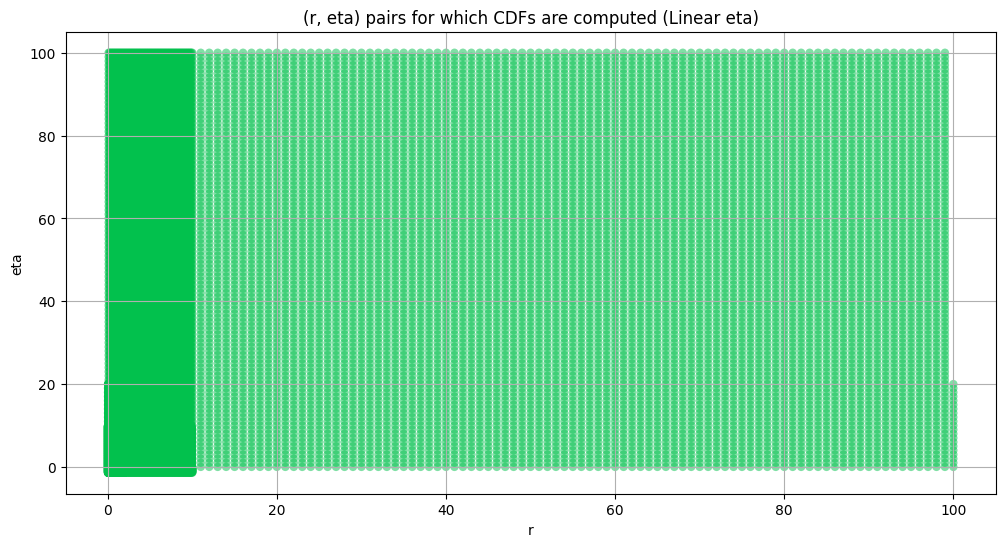

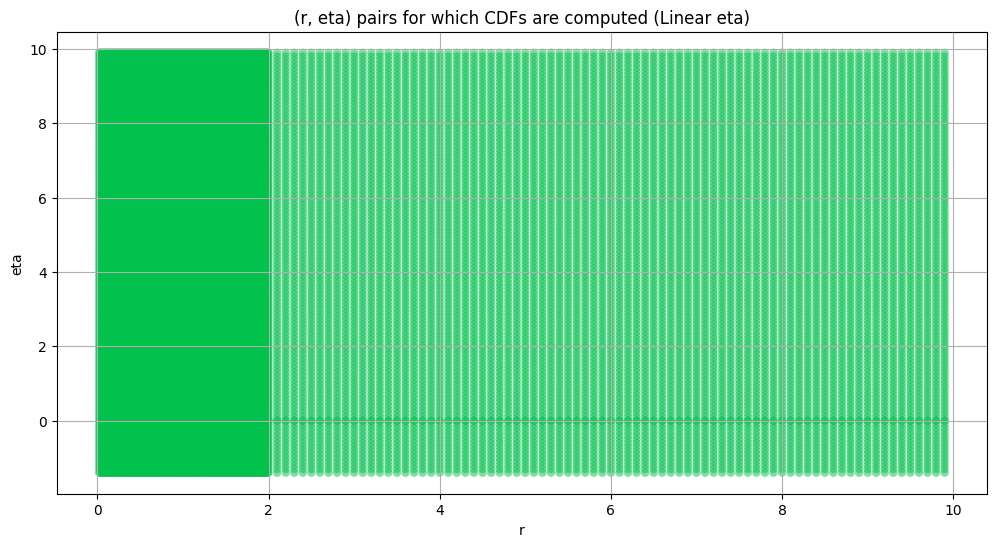

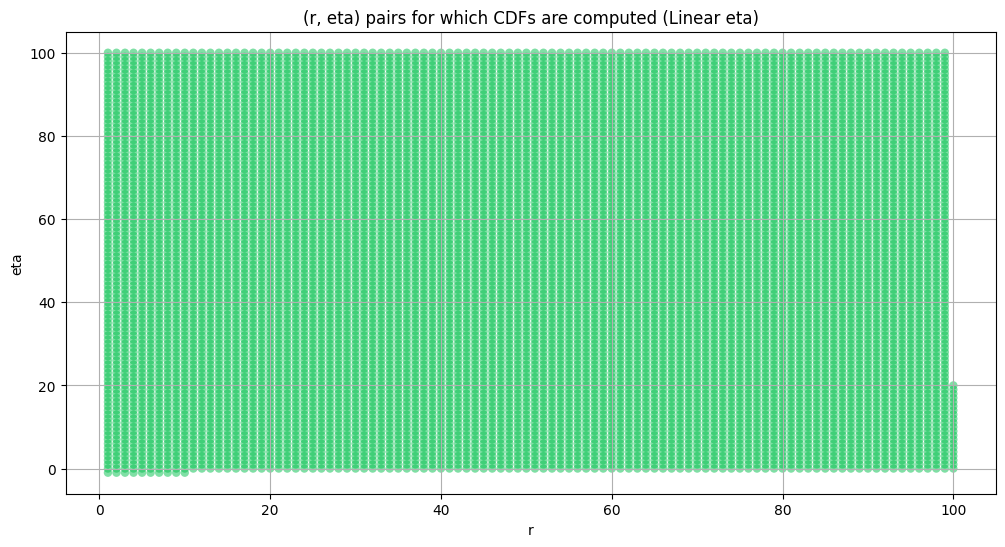

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,r,eta,variance,kurtosis
count,51883.000000,51883.000000,5.188300e+04,5.064200e+04
mean,11.990701,21.476312,inf,inf
std,22.639851,28.237512,inf,NaN
min,0.020000,-1.400000,0.000000e+00,4.787254e-04
25%,1.000000,3.000000,9.882555e-01,1.513901e-02
50%,1.970000,7.600000,1.482803e+00,1.950077e-01
75%,8.100000,32.000000,5.742021e+00,6.565170e-01
max,100.000000,100.000000,1.797693e+308,inf


In [7]:
create_scatter_plot(all_cdfs_df)
create_scatter_plot(all_cdfs_df[(all_cdfs_df['r'] < 10) & (all_cdfs_df['eta'] < 10)])
create_scatter_plot(coarse_cdf_df)

all_cdfs_df.describe()

In [8]:
n_bootstrap = int(1e4)
bootstrap_size = int(1e5)
ci = 0.99

In [9]:
''' Only need to run commented code once'''    
for group in  GROUPS:
    print(f'{GROUP.capitalize()} {group}')
    obs_var, var_lower, var_upper, var_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                             n_bootstrap=n_bootstrap, 
                                                                             bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                             metric= np.var, 
                                                                             ci=ci)
    obs_kurt, kurt_lower, kurt_upper, kurt_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                 n_bootstrap=n_bootstrap, 
                                                                                 bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                 metric= stats.kurtosis, ci=ci)  
    master_df.loc[group, 'obs_var'], master_df.loc[group, 'var_lower'], master_df.loc[group, 'var_upper'] = obs_var, var_lower, var_upper
    master_df.loc[group, 'obs_kurt'], master_df.loc[group, 'kurt_lower'], master_df.loc[group, 'kurt_upper'] = obs_kurt, kurt_lower, kurt_upper
    master_df.loc[group, 'total_samples'] = group_total_samples[group]

master_df.to_csv(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

master_df = pd.read_csv(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'), index_col=GROUP)
var_kurt_df = pd.read_csv(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'), index_col=GROUP)
master_df

Layer 2


100%|██████████| 10000/10000 [00:06<00:00, 1582.58it/s]


Layer 3


100%|██████████| 10000/10000 [00:15<00:00, 631.22it/s]


Layer 4


100%|██████████| 10000/10000 [00:17<00:00, 572.96it/s]


Layer 5


100%|██████████| 10000/10000 [00:15<00:00, 632.53it/s]


Layer 6


100%|██████████| 10000/10000 [00:16<00:00, 593.46it/s]


Layer 7


100%|██████████| 10000/10000 [00:16<00:00, 594.75it/s]


Layer 8


100%|██████████| 10000/10000 [00:17<00:00, 573.08it/s]


Layer 9


100%|██████████| 10000/10000 [00:16<00:00, 622.79it/s]


,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples
layer,,,,,,,
2,17099.889000,16406.396133,17788.965723,4.485044,3.396247,5.924757,27208.0
3,4439.300000,4308.276179,4577.157507,11.245152,8.622312,14.488305,108832.0
4,1375.080000,1337.640381,1414.928511,9.946786,8.102579,12.841204,333298.0
5,383.260470,370.580086,397.222415,15.705747,9.172204,27.391761,1149538.0
6,87.511570,84.757228,90.598290,14.393823,9.844558,21.753825,4251250.0
7,18.372211,17.636356,19.223027,26.509922,12.767423,54.195094,17005000.0
8,3.833243,3.631796,4.082099,50.959682,18.290515,106.529382,68020000.0
9,0.722330,0.653926,0.835257,243.188060,24.078179,559.652386,272080000.0


In [10]:
def add_tests_to_df(cdfs_df, group, var_kurt_df, ksstats):
    cdfs_df['pass_var'] = (cdfs_df['variance'] > var_kurt_df.loc[group, 'var_lower']) & (cdfs_df['variance'] < var_kurt_df.loc[group, 'var_upper'])
    cdfs_df['pass_kurt'] = (cdfs_df['kurtosis'] > var_kurt_df.loc[group, 'kurt_lower']) & (cdfs_df['kurtosis'] < var_kurt_df.loc[group,'kurt_upper'])
    cdfs_df['ksstat'] = ksstats
    cutoff = stats.kstwo(n=var_kurt_df.loc[group, 'total_samples']).isf(0.05)
    cdfs_df['pass_kstest'] = cdfs_df['ksstat'].apply(lambda x: True if x < cutoff else False)
    return cdfs_df

####
Layer  2


100%|██████████| 51883/51883 [00:47<00:00, 1100.25it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 27208, Without approximation : 27208.0


/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


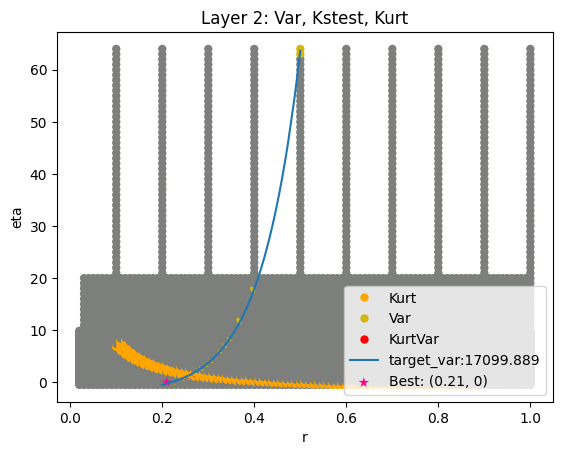

####
Layer  3


100%|██████████| 51883/51883 [02:33<00:00, 337.38it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 108832.0


/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


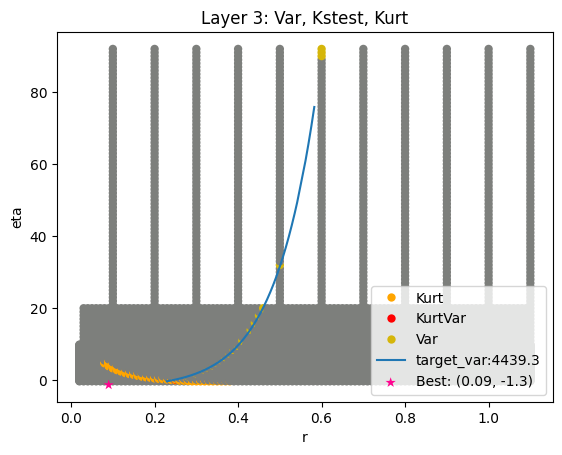

####
Layer  4


100%|██████████| 51883/51883 [02:34<00:00, 335.02it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 333298.0


/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


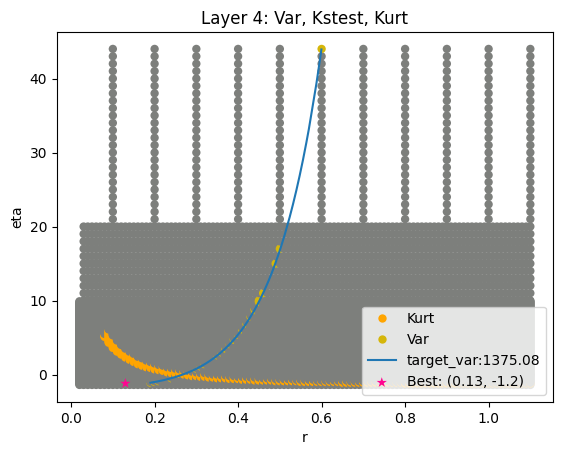

####
Layer  5


100%|██████████| 51883/51883 [02:34<00:00, 335.70it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 1149538.0


/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


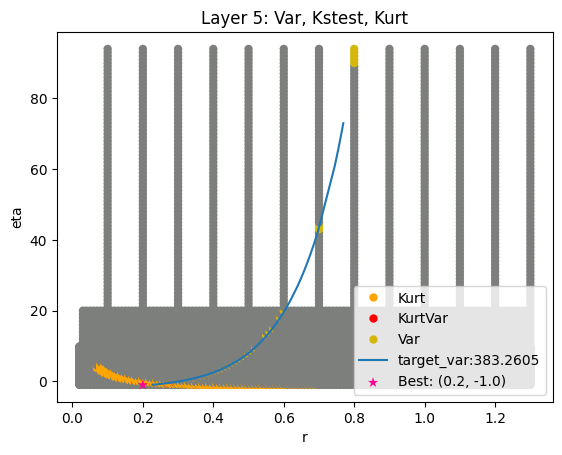

####
Layer  6


100%|██████████| 51883/51883 [02:29<00:00, 346.69it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 4251250.0


/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


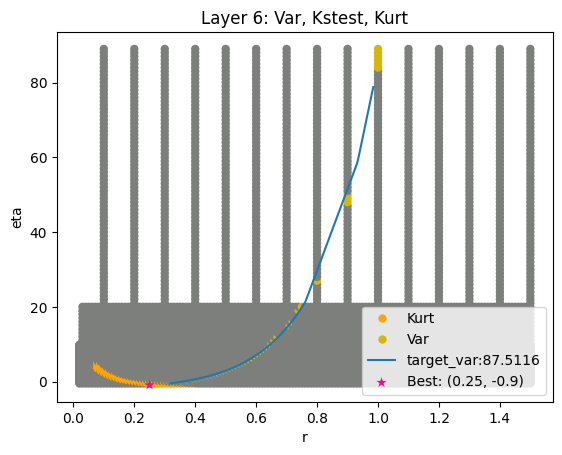

####
Layer  7


100%|██████████| 51883/51883 [02:28<00:00, 348.94it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 17005000.0


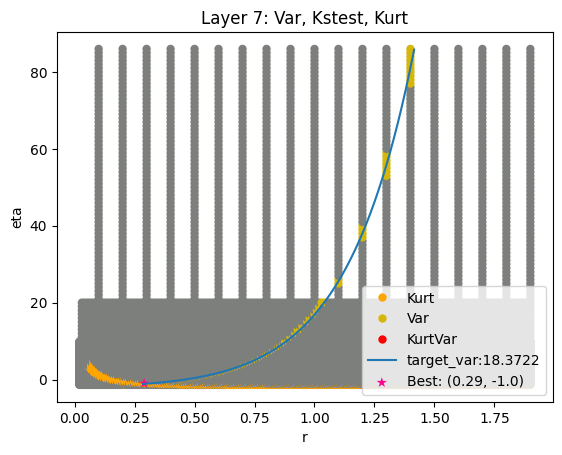

####
Layer  8


100%|██████████| 51883/51883 [02:28<00:00, 348.35it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 68020000.0


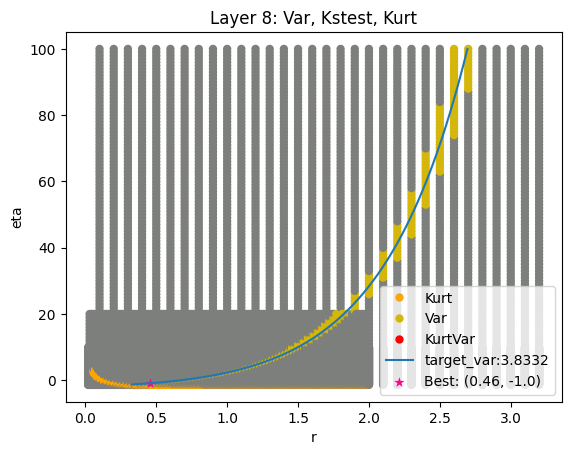

####
Layer  9


100%|██████████| 51883/51883 [02:29<00:00, 347.56it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 272080000.0


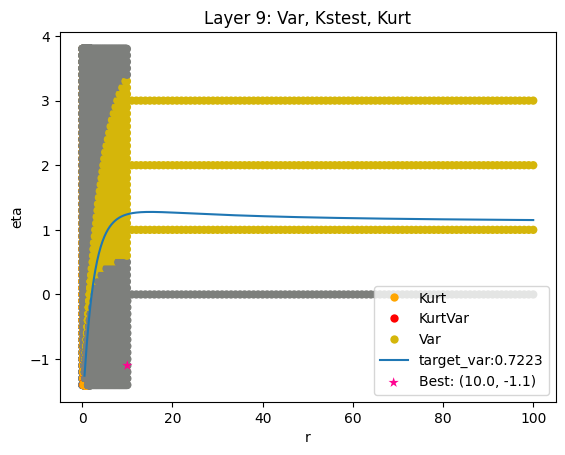

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,kstest_stat_cutoff_0.05
layer,,,,,,,,,,,
2,17099.889000,16406.396133,17788.965723,4.485044,3.396247,5.924757,27208.0,0.21,0.0,0.024839,0.008227
3,4439.300000,4308.276179,4577.157507,11.245152,8.622312,14.488305,108832.0,0.09,-1.3,0.131920,0.004115
4,1375.080000,1337.640381,1414.928511,9.946786,8.102579,12.841204,333298.0,0.13,-1.2,0.075050,0.002352
5,383.260470,370.580086,397.222415,15.705747,9.172204,27.391761,1149538.0,0.20,-1.0,0.039837,0.001267
6,87.511570,84.757228,90.598290,14.393823,9.844558,21.753825,4251250.0,0.25,-0.9,0.029283,0.000659
7,18.372211,17.636356,19.223027,26.509922,12.767423,54.195094,17005000.0,0.29,-1.0,0.019490,0.000329
8,3.833243,3.631796,4.082099,50.959682,18.290515,106.529382,68020000.0,0.46,-1.0,0.014590,0.000165
9,0.722330,0.653926,0.835257,243.188060,24.078179,559.652386,272080000.0,10.00,-1.1,0.028335,0.000082


In [11]:
''' Only need to run commented code once'''
sorted_params = sorted(all_cdfs)
group_cdf_df_dict = dict()

for i, group in enumerate(GROUPS):
    print(f"####\n{GROUP.capitalize()} ", group)
    sample = group_data_map[group]
    group_cdf_df = all_cdfs_df.copy()
    ksstats, initial_param, min_stat = gridsearch(sample, all_cdfs, debug=True)
    master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta'] = initial_param
    print(f"Number of samples: {sample.size}, Without approximation : {master_df.loc[group, 'total_samples']}")
    master_df.loc[group, 'kstest_stat_initial'] = min_stat
    cutoff = stats.kstwo(n=master_df.loc[group, 'total_samples']).isf(0.05)
    master_df.loc[group, 'kstest_stat_cutoff_0.05'] = cutoff

    group_cdf_df = add_tests_to_df(cdfs_df = group_cdf_df, group = group, var_kurt_df = master_df, ksstats = ksstats)
    
    group_cdf_df_dict[group] = group_cdf_df
    cols = ['pass_var', 'pass_kstest', 'pass_kurt']

    fig = combo_test_plot(group_cdf_df_dict[group], cols, 
                          plot_name=f"{GROUP.capitalize()} {group}: {', '.join([col[5:].capitalize() for col in cols])}", 
                          target_var = master_df.loc[group, 'obs_var'],
                          best_param = initial_param)
    
    fig.figure.savefig(os.path.join(CWD, "plots", f"full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)

    # fig_var = create_ci_scatter_plot(group_cdf_df_dict[group], var_values_dict, metric='variance', group=group)
    # fig_kurt = create_ci_scatter_plot(group_cdf_df_dict[group], kurt_values_dict, metric='kurtosis', group=group)

    # fig_var.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
    # plt.close(fig_var)
    # fig_kurt.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
    # plt.close(fig_kurt)

master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_combo.csv"))
pd.to_pickle(group_cdf_df_dict, os.path.join(CWD, "cache", "group_cdf_df_dict_full.pickle"))

group_cdf_df_dict = pd.read_pickle(os.path.join(CWD, "cache", "group_cdf_df_dict_full.pickle"))
master_df = pd.read_csv(os.path.join(CWD, "CSVs", "master_df_combo.csv"), index_col=GROUP)
master_df

In [12]:
''' Only need to run commented code once'''
best_params_eta0 = []
for i, group in enumerate(GROUPS):
    if master_df.loc[group, 'initial_eta'] != 0:
        sample = group_data_map[group]
        group_cdf = all_cdfs_df[all_cdfs_df['eta'] == 0]
        cdfs_dict = {i[0]:i[1] for i in group_cdf['(r,eta),cdf']}
        ksstats, best_param_eta0, kstest_stat_eta0 = gridsearch(sample, cdfs_dict, debug=True)
        best_params_eta0.append(best_param_eta0[0])
        master_df.loc[group, 'kstest_stat_eta0'] = kstest_stat_eta0
    else:
        master_df.loc[group, 'kstest_stat_eta0'] = master_df.loc[group, 'kstest_stat_initial']
        best_params_eta0.append(master_df.loc[group, 'initial_r'])
master_df['best_r_eta0'] = best_params_eta0
master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_eta0.csv"))

master_df = pd.read_csv(os.path.join(CWD, "CSVs", "master_df_eta0.csv"), index_col=GROUP)
master_df

100%|██████████| 369/369 [00:01<00:00, 286.43it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 339.60it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 341.70it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 340.78it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 350.94it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 348.91it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 348.59it/s]

Finding Minimum after computing 369 CDFs


,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,kstest_stat_cutoff_0.05,kstest_stat_eta0,best_r_eta0
layer,,,,,,,,,,,,,
2,17099.889000,16406.396133,17788.965723,4.485044,3.396247,5.924757,27208.0,0.21,0.0,0.024839,0.008227,0.024839,0.21
3,4439.300000,4308.276179,4577.157507,11.245152,8.622312,14.488305,108832.0,0.09,-1.3,0.131920,0.004115,0.131932,0.29
4,1375.080000,1337.640381,1414.928511,9.946786,8.102579,12.841204,333298.0,0.13,-1.2,0.075050,0.002352,0.089232,0.30
5,383.260470,370.580086,397.222415,15.705747,9.172204,27.391761,1149538.0,0.20,-1.0,0.039837,0.001267,0.072695,0.35
6,87.511570,84.757228,90.598290,14.393823,9.844558,21.753825,4251250.0,0.25,-0.9,0.029283,0.000659,0.058204,0.42
7,18.372211,17.636356,19.223027,26.509922,12.767423,54.195094,17005000.0,0.29,-1.0,0.019490,0.000329,0.064111,0.65
8,3.833243,3.631796,4.082099,50.959682,18.290515,106.529382,68020000.0,0.46,-1.0,0.014590,0.000165,0.067410,2.70
9,0.722330,0.653926,0.835257,243.188060,24.078179,559.652386,272080000.0,10.00,-1.1,0.028335,0.000082,0.139455,6.10


In [13]:
def simple_add_cdfs(r_range, eta_range, dir, folder_name = '', n_samples = 500, tail_bound = 0.01, tail_percent = 0.1, enforce_assert=True, return_assert = False, debug=False):

    if folder_name == '':
        folder_name = f'r{round_to_sigfigs(min(r_range))}to{round_to_sigfigs(max(r_range))}_eta{round_to_sigfigs(min(eta_range))}to{round_to_sigfigs(max(eta_range))}'

    FOLDER_PATH = os.path.join(dir, folder_name)

    if os.path.isdir(FOLDER_PATH):
        cdfs_completed = combine_pickles(FOLDER_PATH)
        if debug:
            print("CDFs completed:", len(cdfs_completed))
    else:
        Path(os.path.join(os.getcwd(), FOLDER_PATH)).mkdir()
        cdfs_completed = dict()

    n = len(r_range)*len(eta_range)
    finished = len(cdfs_completed)
    cnt = len(cdfs_completed)
    for r in r_range:
        r_cdf = dict()
        r = round_to_sigfigs(r)
        for eta in eta_range:
            eta = round_to_sigfigs(eta)
            if ((r, eta) in cdfs_completed) and cdfs_completed[(r, eta)]:
                continue
            cnt += 1
            if debug:
                print(f'{(r, eta)}, {cnt} of {n + finished}')
            if cnt % 50 == 0:
                print(f'{(r, eta)}, {cnt} of {n + finished}')

            computed_cdf = compute_prior_cdf(r = r, eta = eta, method = 'gamma_cdf', n_samples = n_samples, tail_percent = tail_percent, tail_bound = tail_bound, 
                                             enforce_assert=enforce_assert, return_assert=return_assert, debug=debug)
            r_cdf[(r, eta)] = computed_cdf
        if r_cdf:
            sorted_r_cdf = [i[1] for i in sorted(r_cdf)]
            min_eta, max_eta = round_to_sigfigs(min(sorted_r_cdf), 6), round_to_sigfigs(max(sorted_r_cdf), 6)
            pkl_path = os.path.join(FOLDER_PATH, f'r{r}_eta{min_eta}to{max_eta}.pickle')
            pd.to_pickle(r_cdf, pkl_path)
        else:
            if debug:
                print(f"Skipped {r} entirely")

    if debug:
        print(f'You can find the CDFs here: {os.path.join(os.getcwd(), FOLDER_PATH)}')

Layer 2
(0.202, -0.01), 50 of 420
(0.204, 0.09), 100 of 420
(0.207, -0.01), 150 of 420
(0.209, 0.09), 200 of 420
(0.212, -0.01), 250 of 420
(0.214, 0.09), 300 of 420
(0.217, -0.01), 350 of 420
(0.219, 0.09), 400 of 420


100%|██████████| 420/420 [00:00<00:00, 1115.45it/s]


Finding Minimum after computing 420 CDFs
Iter 1 layer 2 best parameters: ((0.208, -0.08), 0.02167961163691301)


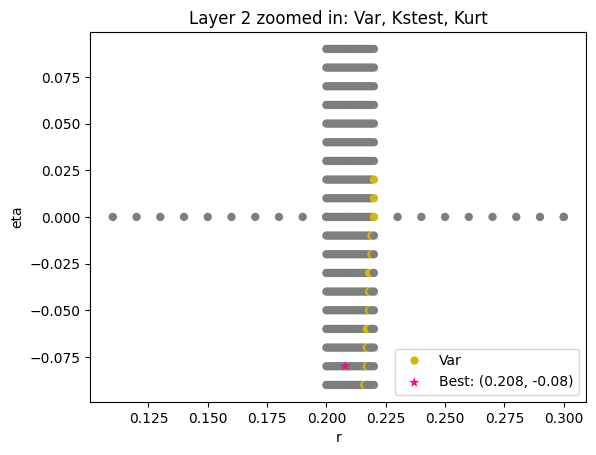

Layer 3
(0.082, -1.33), 50 of 420
(0.084, -1.25), 100 of 420
(0.087, -1.38), 150 of 420
(0.089, -1.3), 200 of 420
(0.091, -1.22), 250 of 420
(0.094, -1.35), 300 of 420
(0.096, -1.27), 350 of 420
(0.099, -1.4), 400 of 420


100%|██████████| 420/420 [00:01<00:00, 334.50it/s]
/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/plotting.py:37: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.scatterplot(df, x='r', y='eta', hue='map', palette = fixed_palette, ax=ax, alpha=1, edgecolor='none')


Finding Minimum after computing 420 CDFs
Iter 1 layer 3 best parameters: ((0.087, -1.37), 0.13191999999999982)


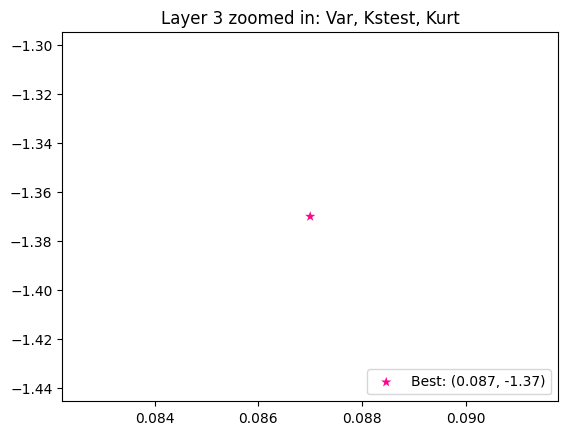

Layer 4
(0.122, -1.23), 50 of 441
(0.124, -1.15), 100 of 441
(0.127, -1.28), 150 of 441
(0.129, -1.2), 200 of 441
(0.131, -1.12), 250 of 441
(0.134, -1.25), 300 of 441
(0.136, -1.17), 350 of 441
(0.139, -1.3), 400 of 441


100%|██████████| 441/441 [00:01<00:00, 318.70it/s]


Finding Minimum after computing 441 CDFs
Iter 1 layer 4 best parameters: ((0.126, -1.23), 0.0750499999999999)


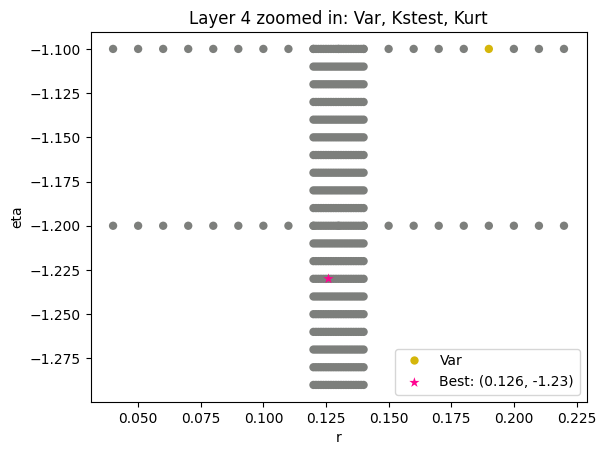

Layer 5
(0.192, -1.03), 50 of 441
(0.194, -0.95), 100 of 441
(0.197, -1.08), 150 of 441
(0.199, -1.0), 200 of 441
(0.201, -0.92), 250 of 441
(0.204, -1.05), 300 of 441
(0.206, -0.97), 350 of 441
(0.209, -1.1), 400 of 441


100%|██████████| 441/441 [00:01<00:00, 324.44it/s]
/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/plotting.py:37: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.scatterplot(df, x='r', y='eta', hue='map', palette = fixed_palette, ax=ax, alpha=1, edgecolor='none')


Finding Minimum after computing 441 CDFs
Iter 1 layer 5 best parameters: ((0.192, -1.04), 0.039835632655620734)


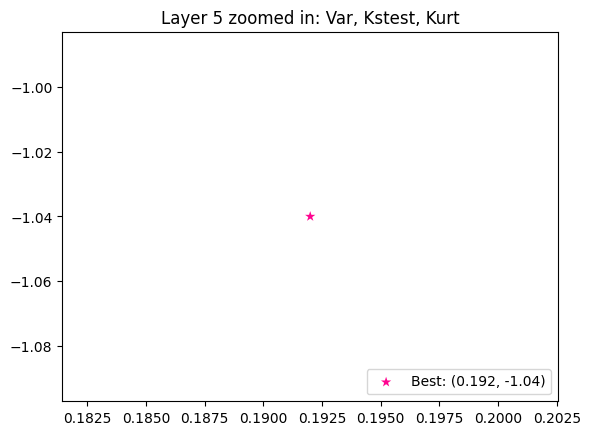

Layer 6
(0.242, -0.91), 50 of 420
(0.244, -0.81), 100 of 420
(0.247, -0.91), 150 of 420
(0.249, -0.81), 200 of 420
(0.252, -0.91), 250 of 420
(0.254, -0.81), 300 of 420
(0.257, -0.91), 350 of 420
(0.259, -0.81), 400 of 420


100%|██████████| 420/420 [00:01<00:00, 336.64it/s]


Finding Minimum after computing 420 CDFs
Iter 1 layer 6 best parameters: ((0.24, -0.95), 0.022743656650760613)


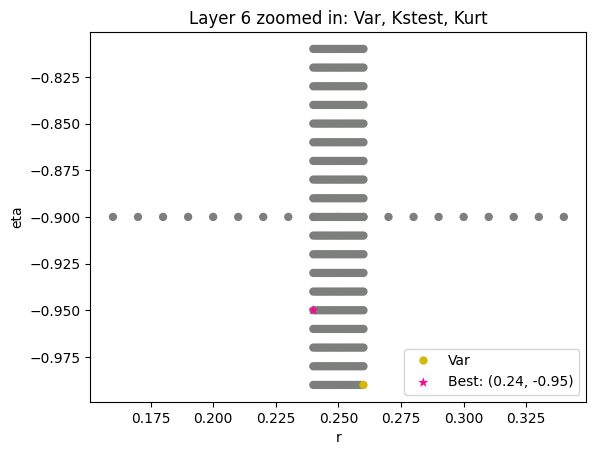

Layer 7
(0.282, -1.03), 50 of 441
(0.284, -0.95), 100 of 441
(0.287, -1.08), 150 of 441
(0.289, -1.0), 200 of 441
(0.291, -0.92), 250 of 441
(0.294, -1.05), 300 of 441
(0.296, -0.97), 350 of 441
(0.299, -1.1), 400 of 441


100%|██████████| 441/441 [00:01<00:00, 340.53it/s]


Finding Minimum after computing 441 CDFs
Iter 1 layer 7 best parameters: ((0.28, -1.03), 0.014094055060368593)


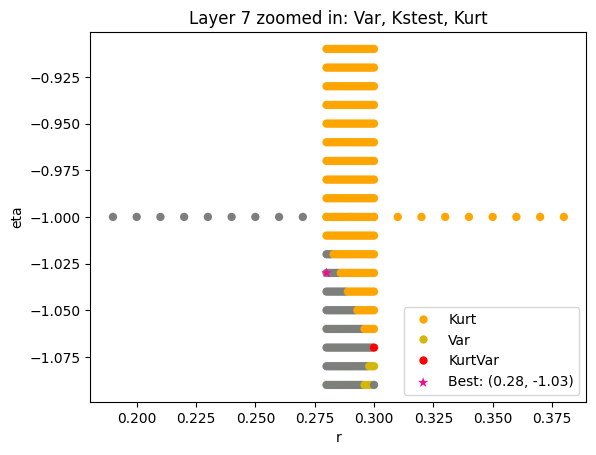

Layer 8
(0.452, -1.03), 50 of 441
(0.454, -0.95), 100 of 441
(0.457, -1.08), 150 of 441
(0.459, -1.0), 200 of 441
(0.461, -0.92), 250 of 441
(0.464, -1.05), 300 of 441
(0.466, -0.97), 350 of 441
(0.469, -1.1), 400 of 441


100%|██████████| 441/441 [00:01<00:00, 342.88it/s]


Finding Minimum after computing 441 CDFs
Iter 1 layer 8 best parameters: ((0.455, -1.01), 0.011964620066127085)


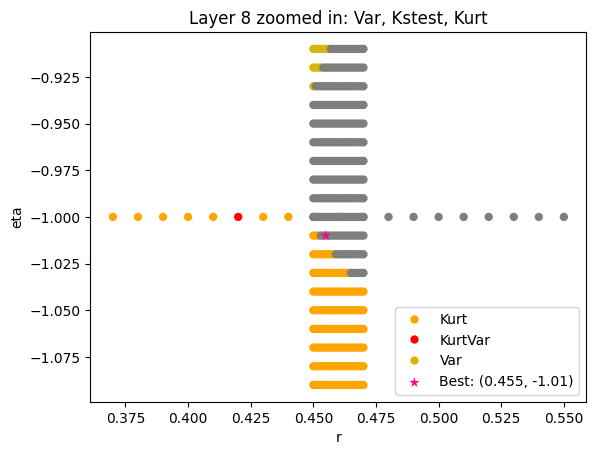

Layer 9
(9.9999, -1.13), 50 of 420
(9.9999, -1.05), 100 of 420
(10.0, -1.18), 150 of 420
(10.0, -1.1), 200 of 420
(10.0, -1.02), 250 of 420
(10.0, -1.15), 300 of 420
(10.0, -1.07), 350 of 420
(10.0, -1.2), 400 of 420


100%|██████████| 42/42 [00:00<00:00, 333.07it/s]
/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/plotting.py:37: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.scatterplot(df, x='r', y='eta', hue='map', palette = fixed_palette, ax=ax, alpha=1, edgecolor='none')


Finding Minimum after computing 42 CDFs
Iter 1 layer 9 best parameters: ((9.9999, -1.08), 0.023452742952533412)


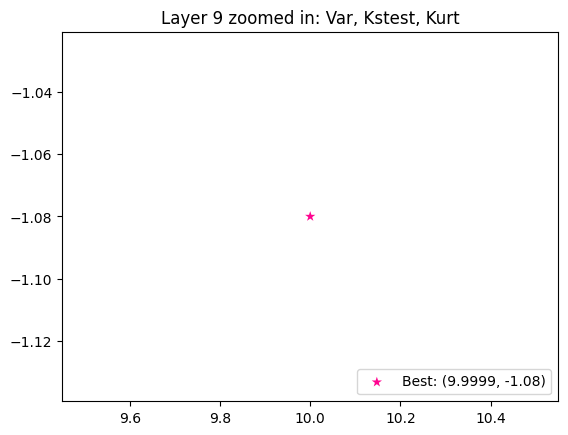

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,kstest_stat_cutoff_0.05,kstest_stat_eta0,best_r_eta0,best_r,best_eta,kstest_stat_best,iter1_r,iter1_eta,kstest_stat_iter1,n_pval_0.05
layer,,,,,,,,,,,,,,,,,,,,
2,17099.889000,16406.396133,17788.965723,4.485044,3.396247,5.924757,27208.0,0.21,0.0,0.024839,0.008227,0.024839,0.21,0.2080,-0.08,0.021680,0.2080,-0.08,0.021680,3825
3,4439.300000,4308.276179,4577.157507,11.245152,8.622312,14.488305,108832.0,0.09,-1.3,0.131920,0.004115,0.131932,0.29,0.0870,-1.37,0.131920,0.0870,-1.37,0.131920,106
4,1375.080000,1337.640381,1414.928511,9.946786,8.102579,12.841204,333298.0,0.13,-1.2,0.075050,0.002352,0.089232,0.30,0.1260,-1.23,0.075050,0.1260,-1.23,0.075050,325
5,383.260470,370.580086,397.222415,15.705747,9.172204,27.391761,1149538.0,0.20,-1.0,0.039837,0.001267,0.072695,0.35,0.1920,-1.04,0.039836,0.1920,-1.04,0.039836,1122
6,87.511570,84.757228,90.598290,14.393823,9.844558,21.753825,4251250.0,0.25,-0.9,0.029283,0.000659,0.058204,0.42,0.2400,-0.95,0.022744,0.2400,-0.95,0.022744,3501
7,18.372211,17.636356,19.223027,26.509922,12.767423,54.195094,17005000.0,0.29,-1.0,0.019490,0.000329,0.064111,0.65,0.2800,-1.03,0.014094,0.2800,-1.03,0.014094,9340
8,3.833243,3.631796,4.082099,50.959682,18.290515,106.529382,68020000.0,0.46,-1.0,0.014590,0.000165,0.067410,2.70,0.4550,-1.01,0.011965,0.4550,-1.01,0.011965,12454
9,0.722330,0.653926,0.835257,243.188060,24.078179,559.652386,272080000.0,10.00,-1.1,0.028335,0.000082,0.139455,6.10,9.9999,-1.08,0.023453,9.9999,-1.08,0.023453,3501


In [14]:
SKIP_OPTIMIZE_STEP = False
NUM_ITERS = dict(zip(GROUPS, [1, 1, 1, 1, 1, 1, 1, 1]))
NUM_SAMPLES_OPTIMIZE = 2000

if SKIP_OPTIMIZE_STEP:
    master_df['kstest_stat'] = master_df['kstest_stat_initial']
    master_df[f'best_r'] = master_df['initial_r']
    master_df[f'best_eta'] = master_df['initial_eta']
else:
    for group in GROUPS: 
        print(f"{GROUP.capitalize()} {group}")
        sample = group_data_map[group]
        initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
        r_granularity = 10
        eta_granularity = 10
        for i in range(-1, -5, -1):
            if tuple([round_to_sigfigs(initial_r + 10.**i), initial_eta]) in all_cdfs:
                r_granularity = 10.**i
            if tuple([initial_r, round_to_sigfigs(initial_eta + 10.**i)]) in all_cdfs:
                
                eta_granularity = 10.**i

        for d in range(1, NUM_ITERS[group] + 1):
            if d == 1:
                initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
            else:
                initial_r, initial_eta = master_df.loc[group, f'iter{d - 1}_r'], master_df.loc[group, f'iter{d - 1}_eta']
            r_granularity = r_granularity * 10.0**(-d+1) 
            eta_granularity = eta_granularity * 10.0**(-d+1) 

            r_range = [round_to_sigfigs(x) for x in np.arange(initial_r - r_granularity, initial_r + r_granularity, r_granularity/10)]
            eta_range = [round_to_sigfigs(x) for x in np.arange(initial_eta - eta_granularity, initial_eta + eta_granularity, eta_granularity/10)]
            simple_add_cdfs(r_range, eta_range, dir = os.path.join(CWD, "groupCDFs"), folder_name=f'{GROUP}{group}', n_samples = NUM_SAMPLES_OPTIMIZE, debug=False, tail_bound=1e-5)
            cdfs_dict = combine_pickles(os.path.join(CWD, "groupCDFs", f'{GROUP}{group}'))
            ksstats, best_param, kstest_stat = gridsearch(sample, cdfs_dict, debug=True)

            temp_df = create_kurt_var_ksstat_df(cdfs_dict)
            temp_df = add_tests_to_df(cdfs_df=temp_df, group=group, var_kurt_df=master_df, ksstats=ksstats)
            group_cdf_df_dict[group] = pd.concat([group_cdf_df_dict[group], temp_df])
            master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta'] = best_param[0], best_param[1]
            master_df.loc[group, 'kstest_stat_best'] = kstest_stat
            master_df.loc[group, f'iter{d}_r'], master_df.loc[group, f'iter{d}_eta'] = best_param[0], best_param[1]
            master_df.loc[group, f'kstest_stat_iter{d}'] = kstest_stat
            
            print(f"Iter {d} {GROUP} {group} best parameters: {best_param, master_df.loc[group, f'kstest_stat_iter{d}']}")

        temp_df = group_cdf_df_dict[group]
        eps = 0.1
        filtered_df = temp_df[(temp_df['r'] > master_df.loc[group, 'initial_r'] - eps) & 
                        (temp_df['r'] < master_df.loc[group, 'initial_r'] + eps) &
                        (temp_df['eta'] > master_df.loc[group, 'initial_eta'] - eps) &
                        (temp_df['eta'] < master_df.loc[group, 'initial_eta'] + eps)]
        cols = ['pass_var', 'pass_kstest', 'pass_kurt']
        fig = combo_test_plot(filtered_df, cols, 
                              plot_name=f"{GROUP.capitalize()} {group} zoomed in: {', '.join([col[5:].capitalize() for col in cols])}",
                              best_param=(master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta']))
        fig.figure.savefig(os.path.join(CWD, "plots", f"optimized_full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)
        
master_df['n_pval_0.05'] = master_df.apply(lambda row : find_n_fixed_pval_stat(row.loc['kstest_stat_best'], row.loc['total_samples']), axis = 1)    
master_df[['total_samples', 'initial_r', 'initial_eta', 'kstest_stat_initial', f'best_r', f'best_eta', 'kstest_stat_best', 'n_pval_0.05']].to_csv(os.path.join(CWD, "CSVs", 'optimized_params.csv'))
master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))

master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'), index_col = GROUP)
master_df

## Comparing Empirical and Computed CDF/PDF

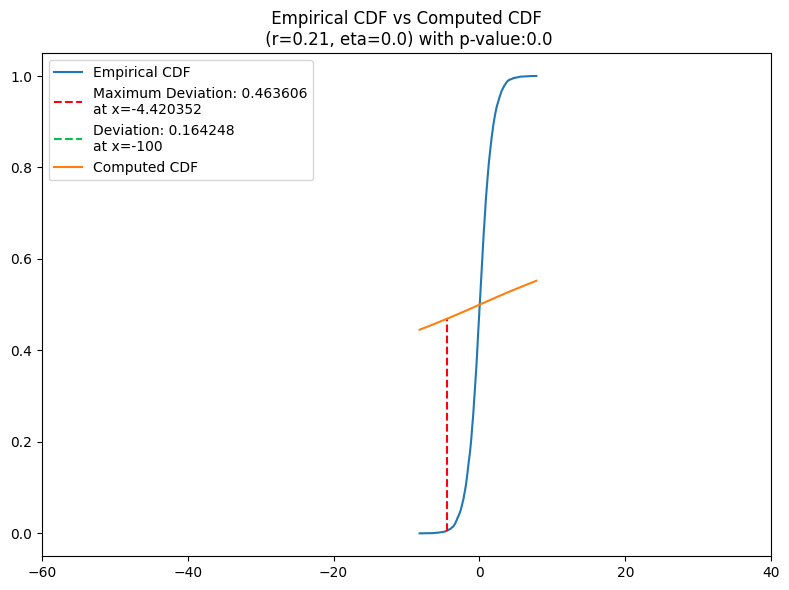

In [15]:
# Example Cell
group = 2
visualize_cdf(sample = sample_prior(1, 1, 10000), 
              all_cdfs = None, 
              params = (master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta']),
              distro = 'gengamma',
              n_samples=200, 
              interval = (-60, 40), 
              provided_loc = -100);

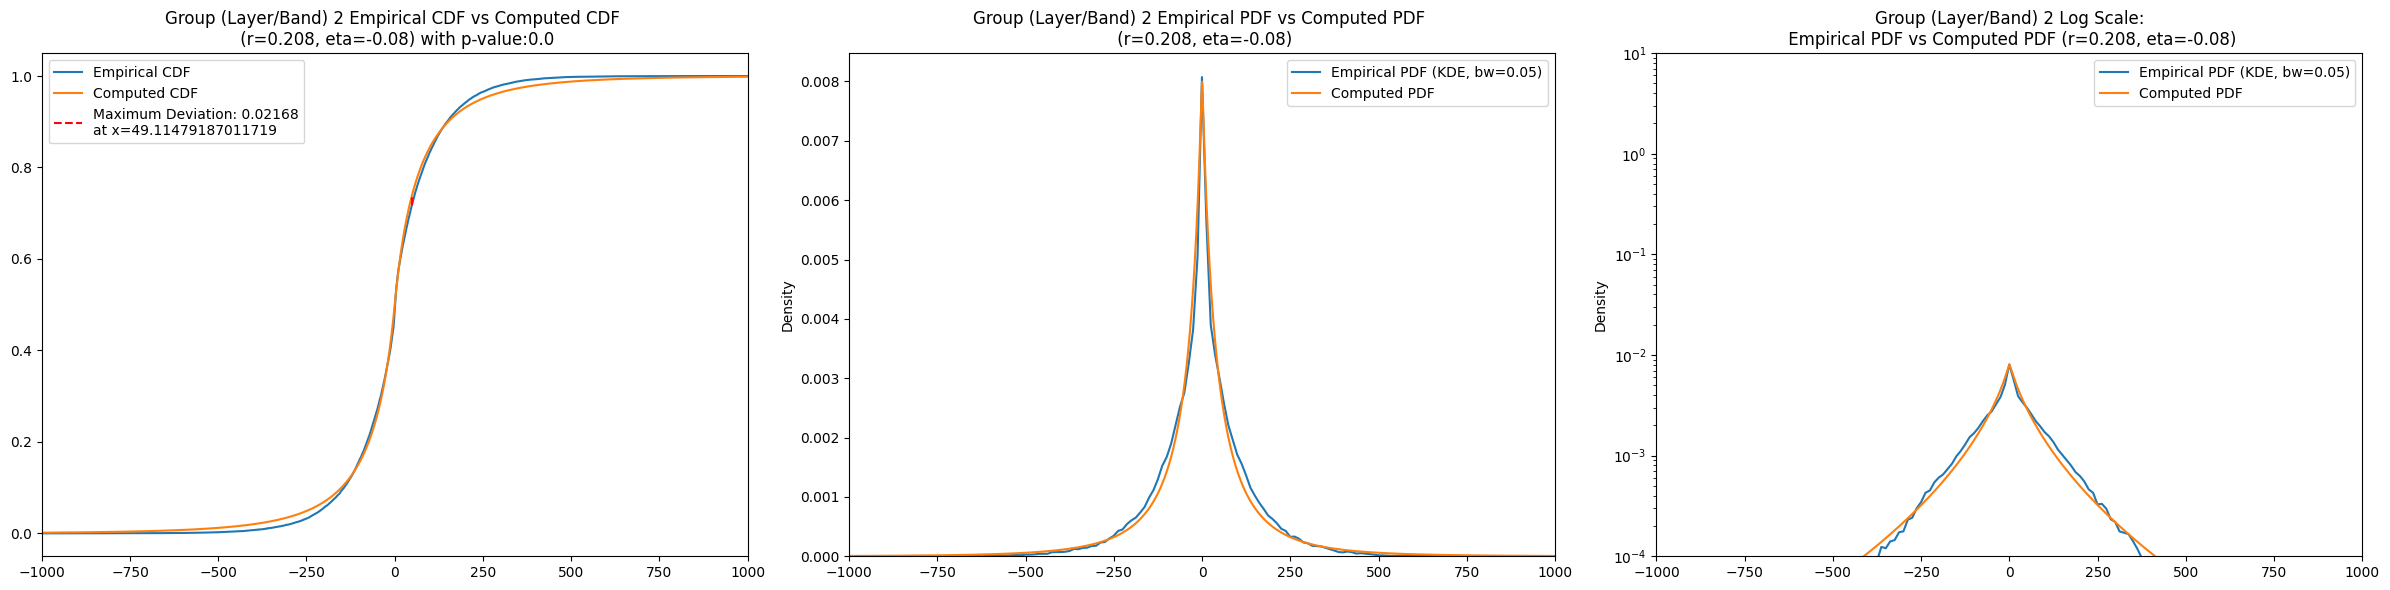

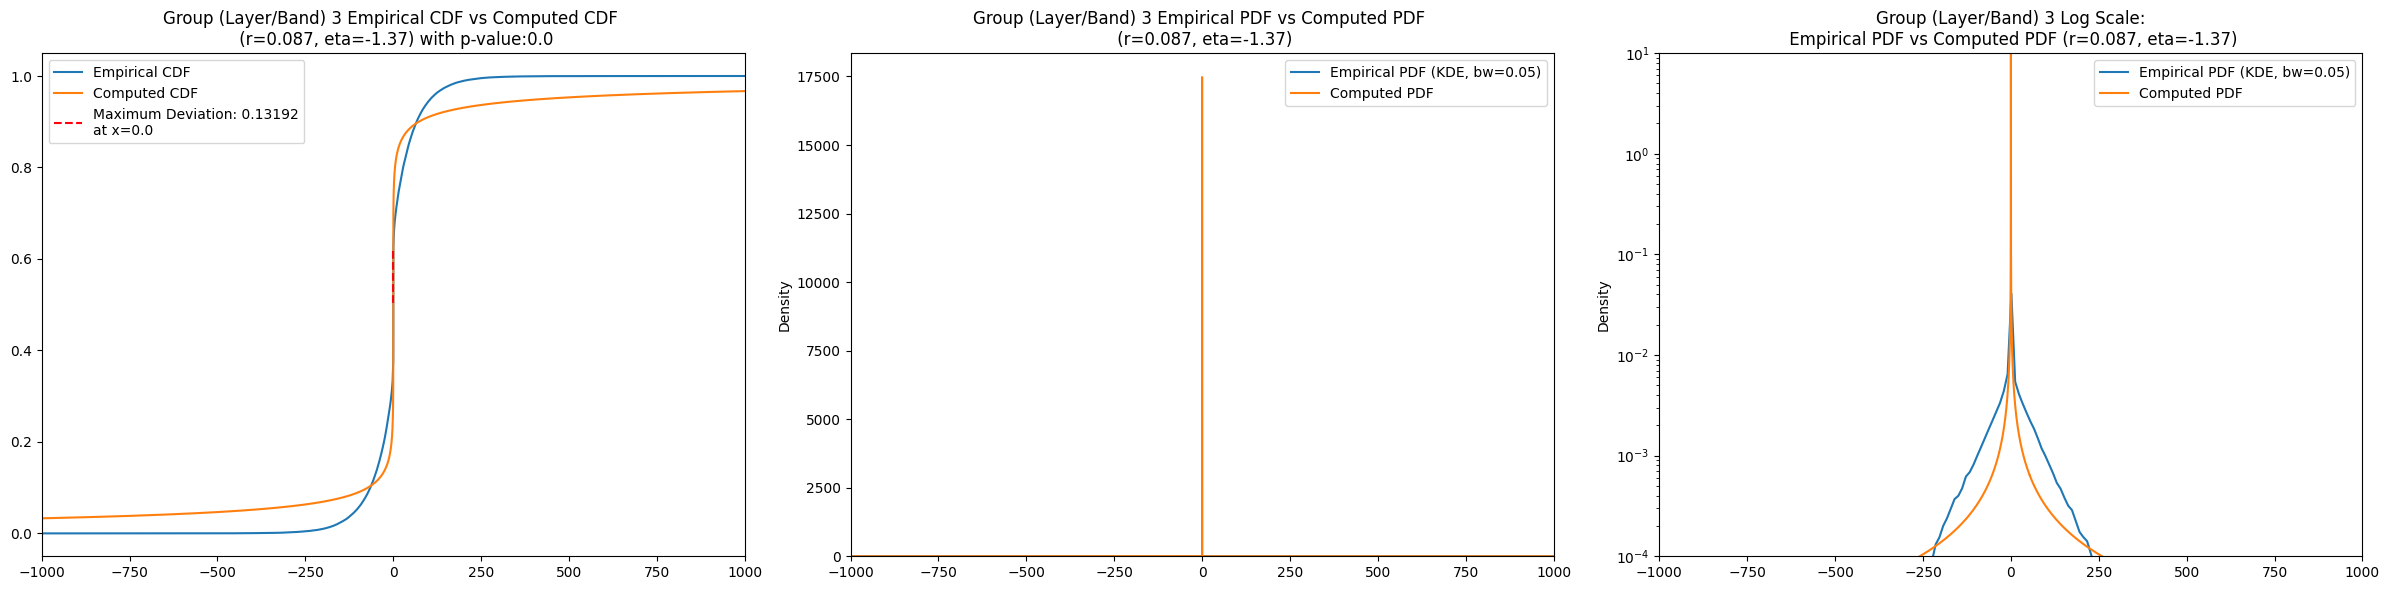

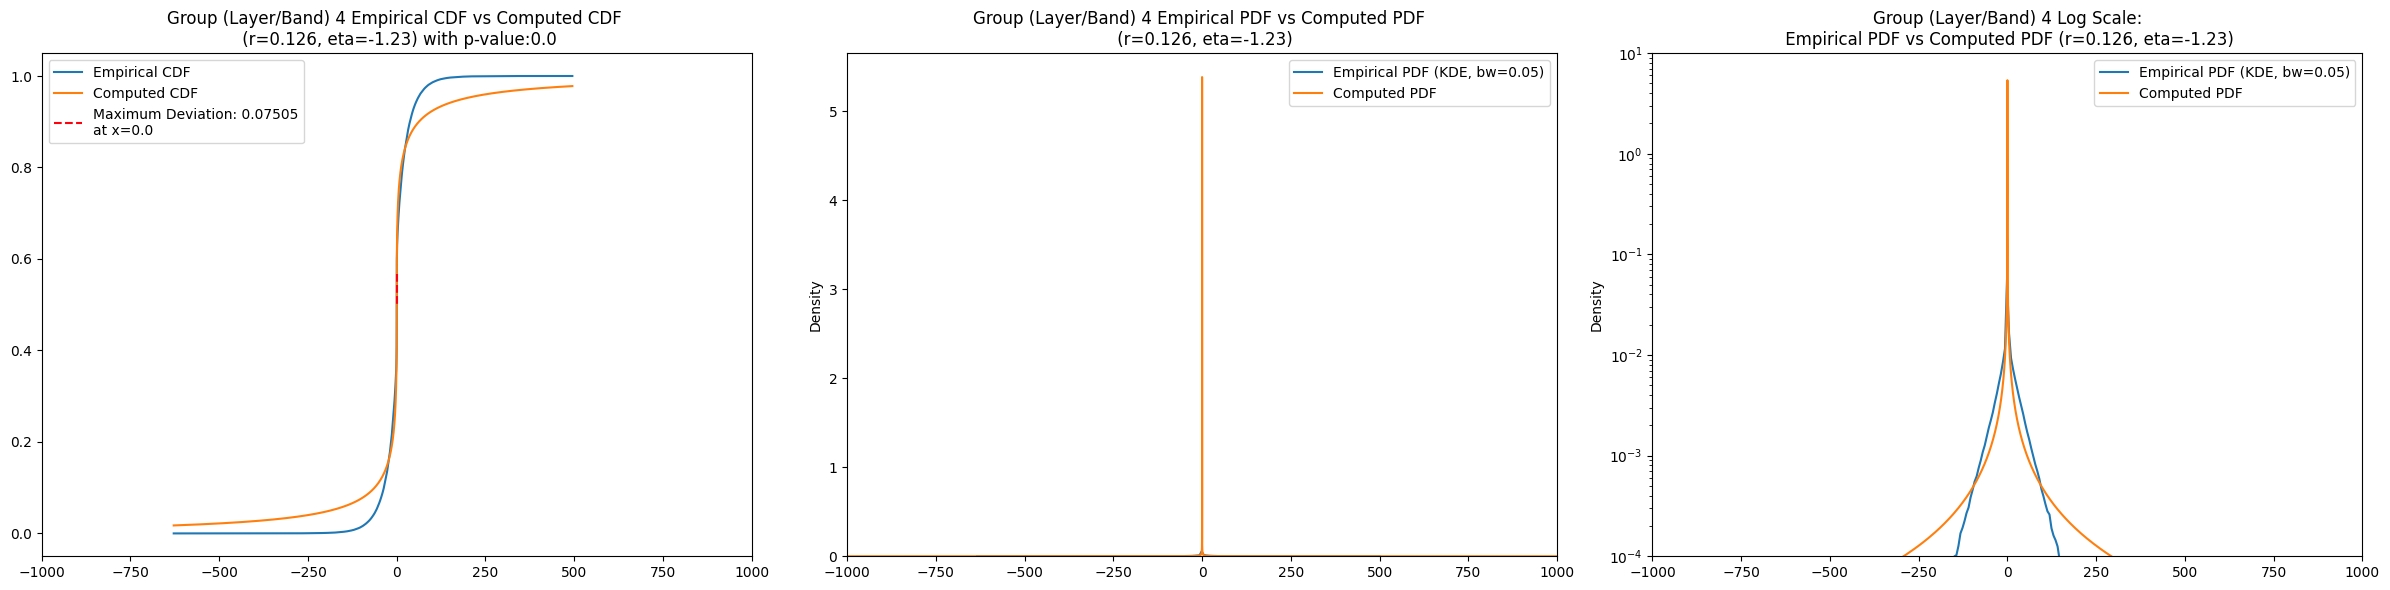

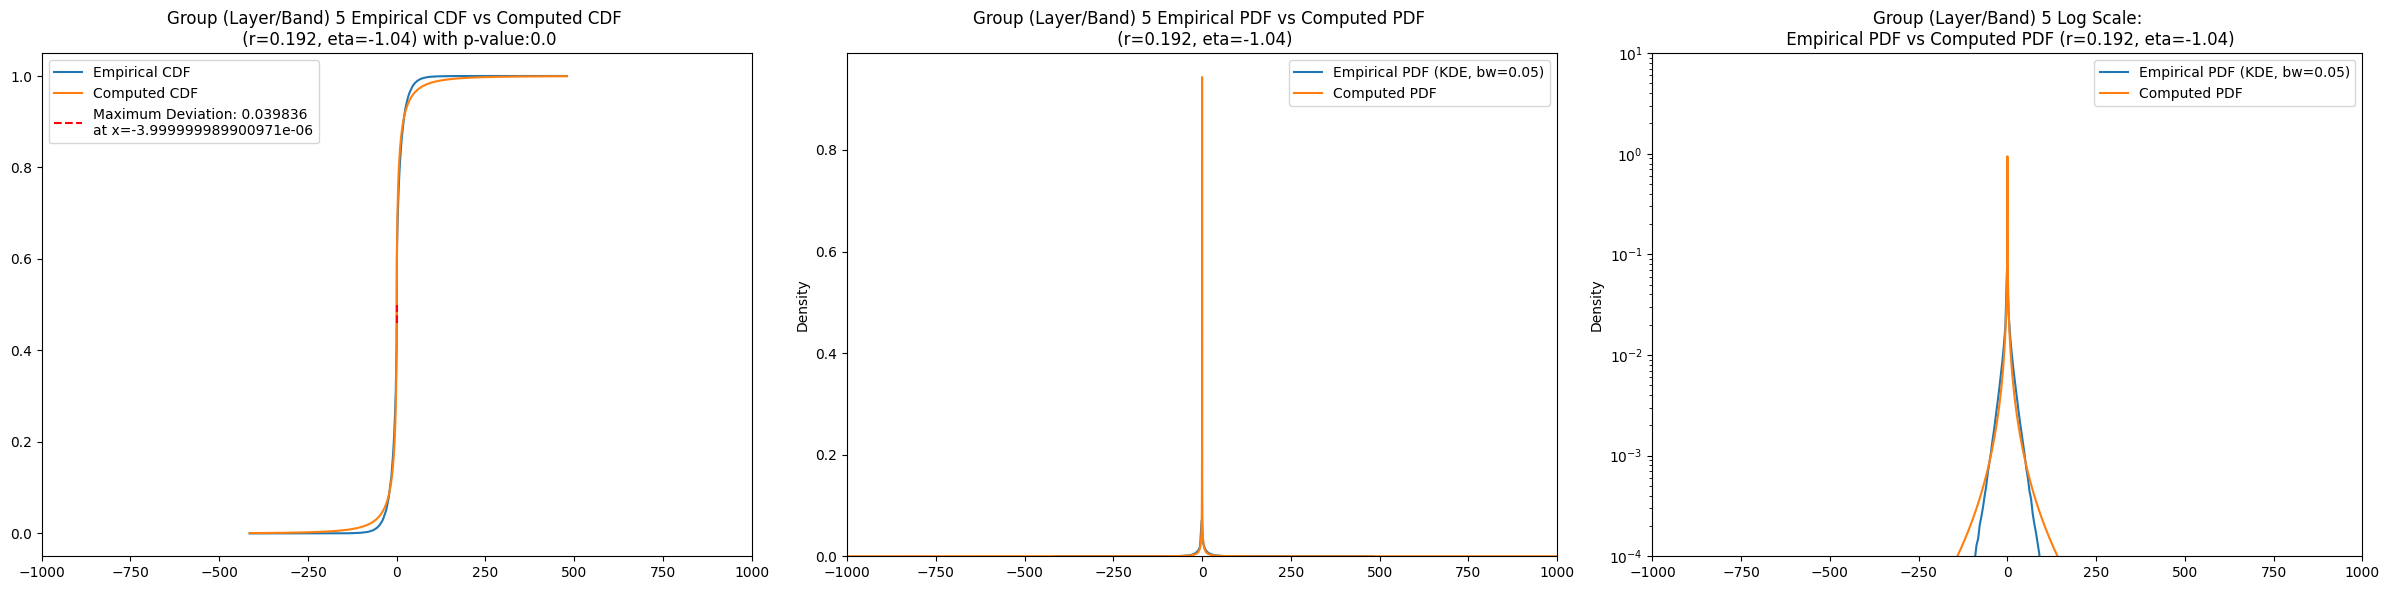

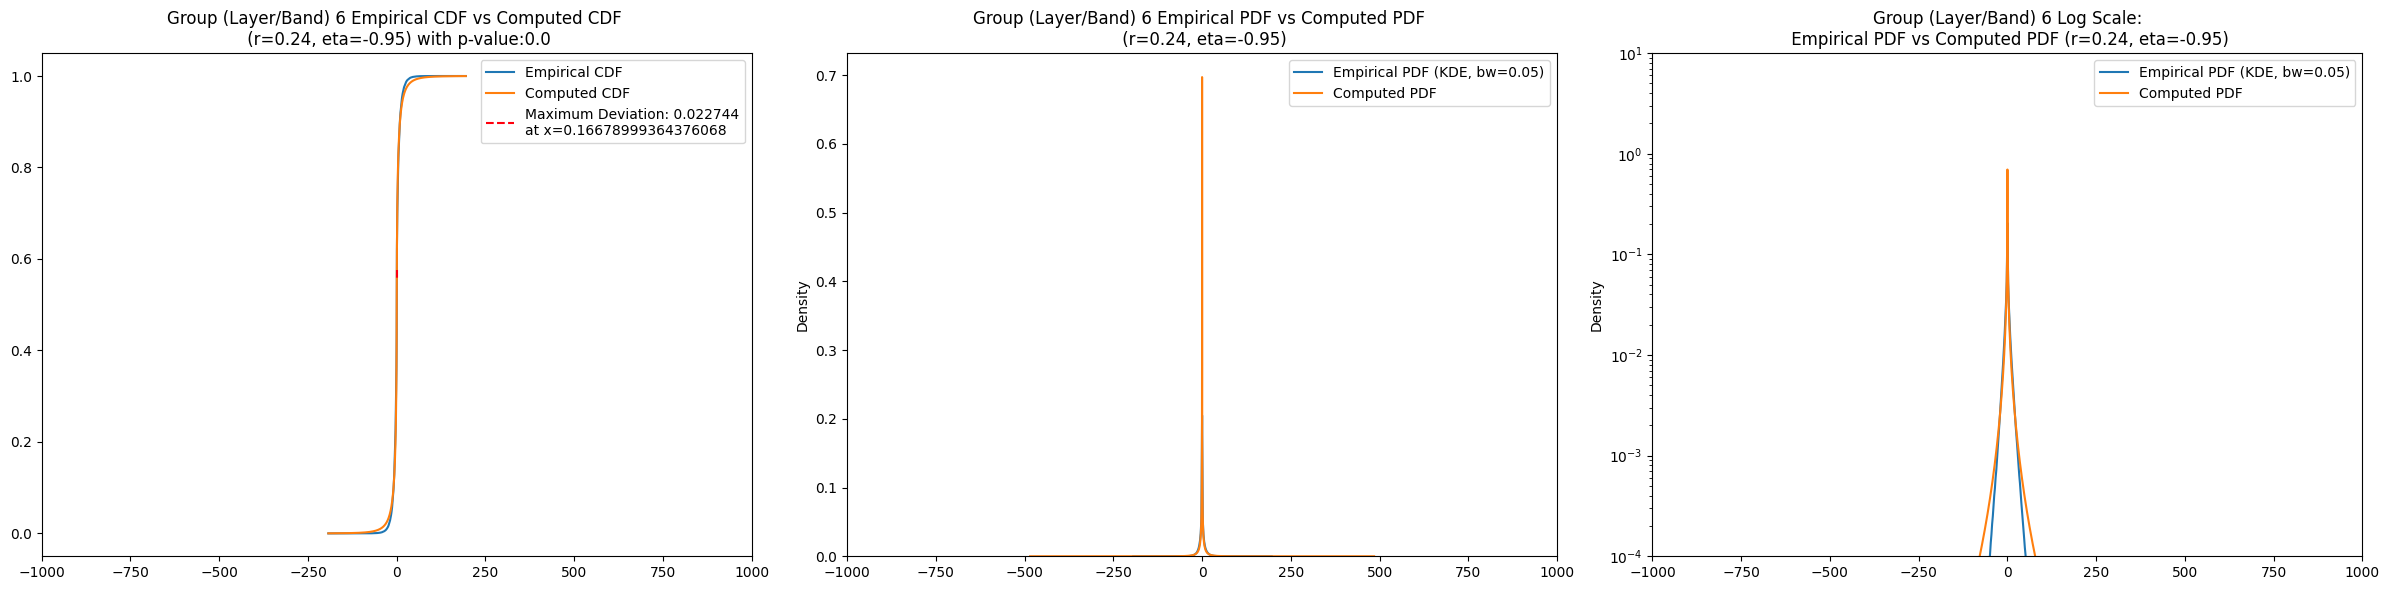

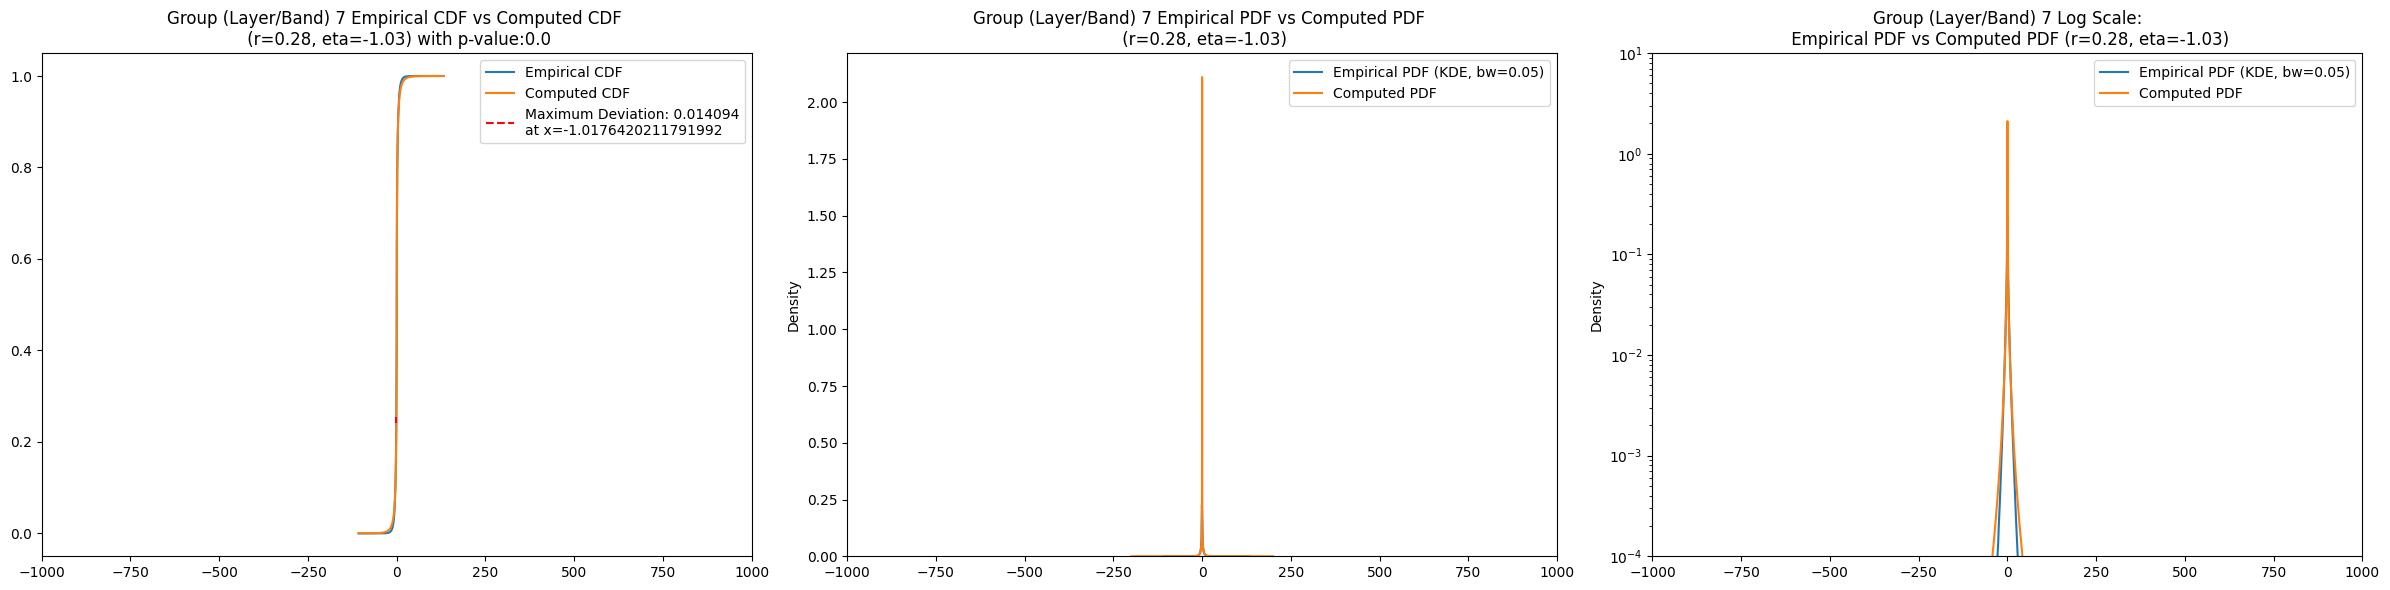

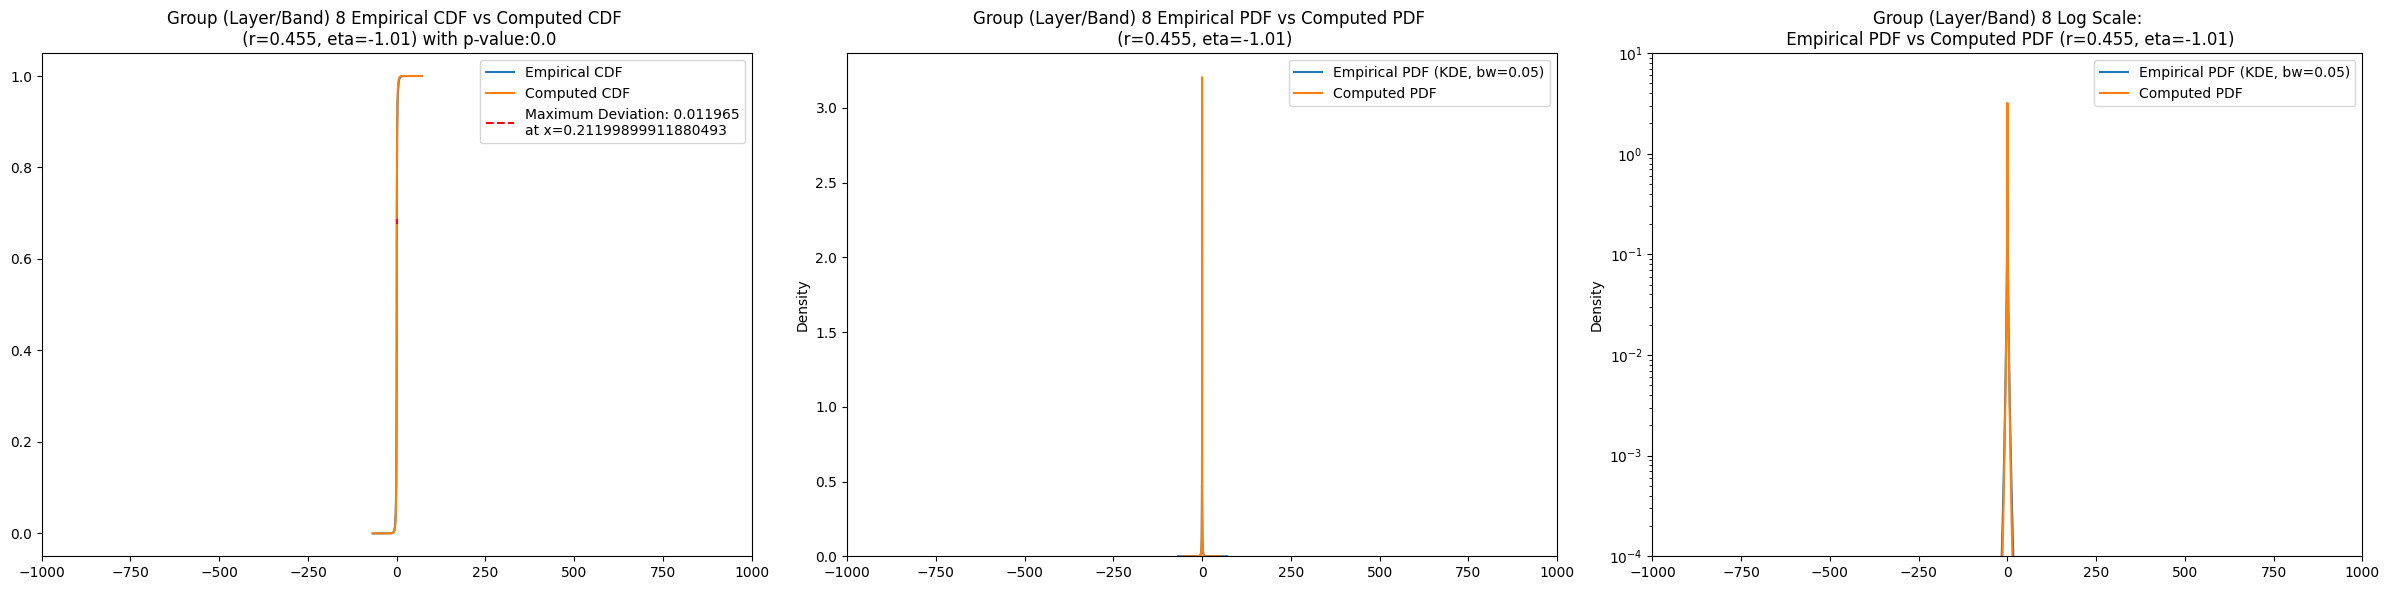

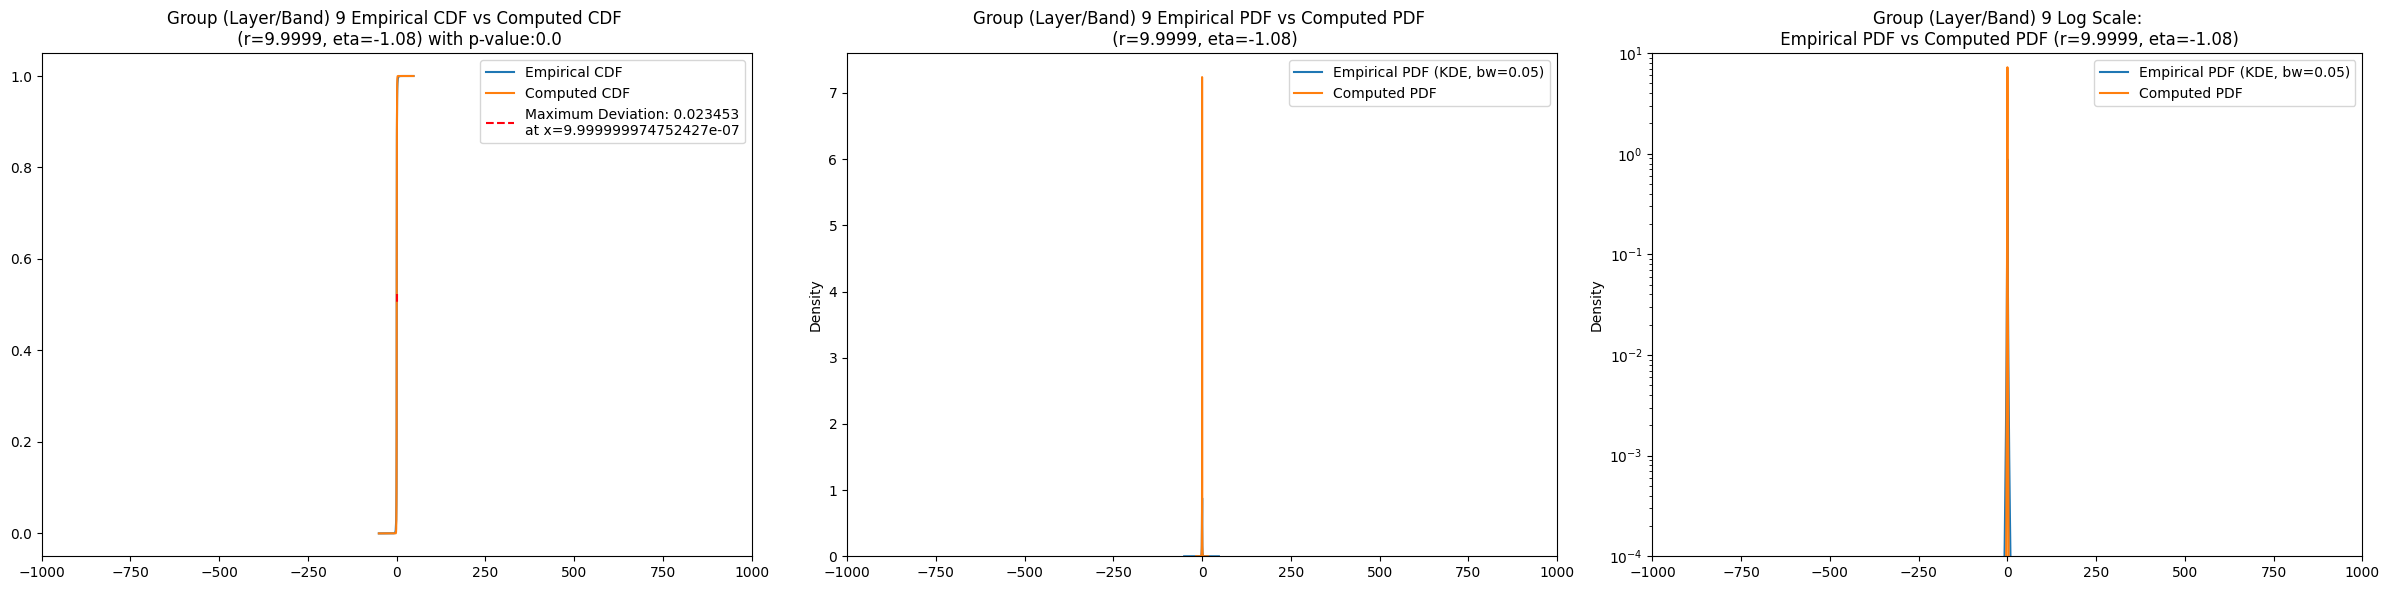

In [16]:
for group in GROUPS:
    group_info = master_df.loc[group]
    best_r = group_info['best_r']
    best_eta = group_info['best_eta']
    fig = visualize_cdf_pdf(sample = group_data_map[group], 
                    params = (best_r, best_eta), 
                    log_scale = True,
                    group = group,
                    interval = (-1000, 1000))#,
                    #provided_loc=(30 - group//3.1*8))
    fig.savefig(os.path.join(CWD, "plots", f'compare_cdf_pdf_layer_{group}.jpg'), bbox_inches = 'tight', dpi = 600)

## Comparing with Gaussian and Laplace

In [17]:
def generate_func(sample, distro, *args, n_samples=200):
    if distro == 'gaussian' or distro == 'normal':
        def var_func(var):
            cdf = scipy.stats.norm(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'laplace':
        def var_func(var):
            cdf = scipy.stats.laplace(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 't':
        def var_func(var):
            cdf = scipy.stats.t(df=2, scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'prior_r':
        eta = args[0]
        def r_func(r):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return r_func
    elif distro == 'prior_eta':
        r = args[0]
        def eta_func(eta):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return eta_func
    elif distro == 'prior':
        def r_eta_func(params):
            r = params[0]
            eta = params[1]
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples, debug=False)
            return compute_ksstat(sample, cdf)
        return r_eta_func

    print("Please enter a valid argument for `distro`: 'gaussian', 'laplace', 'prior_r', 'prior_eta', 'prior', 't'")

In [18]:
for group in GROUPS:
    norm_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'gaussian'), method = 'bounded', bounds = (0, 50))
    laplace_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'laplace'), method = 'bounded', bounds = (0, 50))
    t_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 't'), method = 'bounded', bounds = (0, 50))
    
    master_df.loc[group, 'param_gaussian'] = round_to_sigfigs(norm_result['x'], 6)
    master_df.loc[group, 'kstest_stat_gaussian'] = round_to_sigfigs(norm_result['fun'], 6)
    master_df.loc[group, 'kstest_pval_gaussian'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_gaussian']), 6)

    master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
    master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
    master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6)

    master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
    master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
    master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6) 

    master_df.loc[group, 'param_t'] = round_to_sigfigs(t_result['x'], 6)
    master_df.loc[group, 'kstest_stat_t'] = round_to_sigfigs(t_result['fun'], 6)
    master_df.loc[group, 'kstest_pval_t'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_t']), 6) 

    master_df.loc[group, 'kstest_pval_gengamma'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_best']))

master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))
master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
master_df

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,...,param_gaussian,kstest_stat_gaussian,kstest_pval_gaussian,param_laplace,kstest_stat_laplace,kstest_pval_laplace,param_t,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma
layer,,,,,,,,,,,,,,,,,,,,,
2,17099.889000,16406.396133,17788.965723,4.485044,3.396247,5.924757,27208.0,0.21,0.0,0.024839,...,50.000000,0.149302,0.0,50.000000,0.103913,2.983190e-256,50.000000,0.079374,1.510170e-149,1.535500e-11
3,4439.300000,4308.276179,4577.157507,11.245152,8.622312,14.488305,108832.0,0.09,-1.3,0.131920,...,20.614500,0.134921,0.0,14.469600,0.131934,0.000000e+00,11.582400,0.131936,0.000000e+00,0.000000e+00
4,1375.080000,1337.640381,1414.928511,9.946786,8.102579,12.841204,333298.0,0.13,-1.2,0.075050,...,15.021000,0.104086,0.0,11.613900,0.091566,0.000000e+00,9.375280,0.094498,0.000000e+00,0.000000e+00
5,383.260470,370.580086,397.222415,15.705747,9.172204,27.391761,1149538.0,0.20,-1.0,0.039837,...,8.598790,0.089174,0.0,6.679580,0.075348,0.000000e+00,5.375860,0.078321,0.000000e+00,0.000000e+00
6,87.511570,84.757228,90.598290,14.393823,9.844558,21.753825,4251250.0,0.25,-0.9,0.029283,...,4.491680,0.075957,0.0,3.593070,0.058225,0.000000e+00,2.904830,0.061891,0.000000e+00,0.000000e+00
7,18.372211,17.636356,19.223027,26.509922,12.767423,54.195094,17005000.0,0.29,-1.0,0.019490,...,1.808860,0.081337,0.0,1.489770,0.060195,0.000000e+00,1.185750,0.063778,0.000000e+00,0.000000e+00
8,3.833243,3.631796,4.082099,50.959682,18.290515,106.529382,68020000.0,0.46,-1.0,0.014590,...,0.760144,0.078150,0.0,0.656985,0.051940,0.000000e+00,0.516646,0.053330,0.000000e+00,0.000000e+00
9,0.722330,0.653926,0.835257,243.188060,24.078179,559.652386,272080000.0,10.00,-1.1,0.028335,...,0.382418,0.058575,0.0,0.336840,0.031391,0.000000e+00,0.268259,0.030291,0.000000e+00,0.000000e+00


# Examining Tail Behavior

In [19]:
# def add_metric_tail(metric_name = 'kstest_ratio',  distro = 'gengamma', tail_cutoffs = [0], layers = np.arange(2, 9)):
#     if metric_name == 'kstest_ratio':
#         metric = compute_ksratio
#     elif metric_name == 'kstest_stat':
#         metric = compute_ksstat_tail

#     for tail_cutoff in tail_cutoffs:
#         metrics = []
#         for layer in layers:
#             if distro == 'gengamma':
#                 cdf = all_cdfs[(master_df.loc[layer, 'initial_r'], master_df.loc[layer, 'initial_eta'])]
#             elif distro == 'gaussian':
#                 cdf = scipy.stats.norm(scale = master_df.loc[layer, 'param_gaussian']).cdf
#             elif distro == 'laplace':
#                 cdf = scipy.stats.norm(scale = master_df.loc[layer, 'param_laplace']).cdf
#             elif distro == 't':
#                 cdf = scipy.stats.t(df = 2, scale = master_df.loc[layer, 'param_t']).cdf
#             metrics.append(metric(group_data_map[layer], cdf, tail_cutoff = tail_cutoff))
#         master_df[metric_name + '_' + distro + '_' + f'tail{tail_cutoff}'] = metrics
        
# for group in GROUPS:
#     add_metric_tail('kstest_ratio', distro = 'gengamma', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 'gaussian', tail_cutoffs= [0,10], layers = np.arange(2, 9)) 
#     add_metric_tail('kstest_ratio', distro = 'laplace', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 't', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_stat', distro = 'gengamma', tail_cutoffs= [2, 10], layers = np.arange(2, 9))

# master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))

# master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
# master_df

# Results

## KS-Test Statistics

In [20]:
import pandas as pd
master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))

In [21]:
master_df.filter(regex='total_samples|kstest_stat.*')
#master_df.filter(regex='total_samples|param.*')
# master_df.filter(regex='.*gaussian')
#master_df.filter(regex='kstest_stat_.*[\_(tail\d)]')
#master_df.filter(regex='.*_tail\d\d?')
#master_df.filter(regex='.*_t_.*')


,total_samples,kstest_stat_initial,kstest_stat_cutoff_0.05,kstest_stat_eta0,kstest_stat_best,kstest_stat_iter1,kstest_stat_gaussian,kstest_stat_laplace,kstest_stat_t
0,27208.0,0.024839,0.008227,0.024839,0.021680,0.021680,0.149302,0.103913,0.079374
1,108832.0,0.131920,0.004115,0.131932,0.131920,0.131920,0.134921,0.131934,0.131936
2,333298.0,0.075050,0.002352,0.089232,0.075050,0.075050,0.104086,0.091566,0.094498
3,1149538.0,0.039837,0.001267,0.072695,0.039836,0.039836,0.089174,0.075348,0.078321
4,4251250.0,0.029283,0.000659,0.058204,0.022744,0.022744,0.075957,0.058225,0.061891
5,17005000.0,0.019490,0.000329,0.064111,0.014094,0.014094,0.081337,0.060195,0.063778
6,68020000.0,0.014590,0.000165,0.067410,0.011965,0.011965,0.078150,0.051940,0.053330
7,272080000.0,0.028335,0.000082,0.139455,0.023453,0.023453,0.058575,0.031391,0.030291
